In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ashd.database import Source, Image
import ashd

In [2]:
engine = ashd.database.connect('/Users/protostar/local_data/asas-sn-hd-io/asas-sn-hd-safe.db')
session = ashd.database.Session()
query = session.query(Source)
cat = pd.read_sql(query.statement, engine)

In [3]:
cut = cat.peak < cat.peak.median()
cut &= (cat.a > 7*cat.a.median())
cut &= cat.x > 100
cut &= cat.x < 1948
cut &= cat.y > 100
cut &= cat.y < 1948

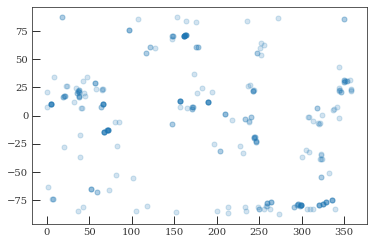

In [4]:
plt.scatter(cat.loc[cut, 'ra'], cat.loc[cut, 'dec'], alpha=0.2)

In [141]:
cat[cut].to_csv('/Users/protostar/Desktop/ashd-cat.csv', index=False)